## Install Libraries



In [ ]:
import numpy as np
import pandas as pd
from scipy import signal
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

%matplotlib inline

## Colab setup



In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## ECG Dataset



In [ ]:
file_loc= "/content/drive/MyDrive/Colab Notebooks/all_records_train.csv"
data = pd.read_csv(file_loc, index_col=0).reset_index(drop=True)
# Patients 201 and 202 are the same person
data.loc[data['Patient']==202, 'Patient']=201
data

,0,1,2,3,4,5,6,7,8,9,...,480,481,482,483,484,485,486,487,Class,Patient
0,0.480831,0.626198,0.749201,0.837061,0.881789,0.867412,0.793930,0.627796,0.423323,0.218850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,113
1,0.665966,0.743697,0.804622,0.838235,0.821429,0.741597,0.607143,0.472689,0.338235,0.203782,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,116
2,0.519115,0.591549,0.655936,0.708249,0.760563,0.808853,0.865191,0.925553,0.969819,0.963783,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,223
3,0.834783,0.902174,0.950000,0.965217,0.939130,0.873913,0.784783,0.697826,0.606522,0.517391,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,112
4,0.625483,0.722008,0.803089,0.872587,0.915058,0.918919,0.880309,0.795367,0.698842,0.594595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76060,0.401024,0.500000,0.587031,0.667235,0.735495,0.786689,0.825939,0.848123,0.858362,0.846416,...,0.127986,0.131399,0.127986,0.124573,0.124573,0.122867,0.12116,0.119454,N,124
76061,0.706231,0.802671,0.891691,0.951039,0.968843,0.921365,0.790801,0.600890,0.410979,0.221068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,220
76062,0.559643,0.652174,0.726867,0.782609,0.804905,0.790412,0.731327,0.626533,0.490524,0.365663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,119
76063,0.510000,0.652000,0.784000,0.888000,0.952000,0.972000,0.948000,0.884000,0.752000,0.572000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,N,119


In [ ]:
data.shape

(76065, 490)

## Downsample data

In [ ]:
y = data.values[:,:-2].astype(float)
f = signal.decimate(y, 3)
df_f = pd.DataFrame(f)
df_f.shape

(76065, 163)

In [ ]:
# Check downsampling effect

fig = go.Figure()
x_axis = list(range(data.shape[1]))

for i in range(5):
    fig.add_trace(go.Scatter(x=x_axis, y=data.iloc[i,:-2].values,
              mode='lines', name=str(data.iloc[i,-2]) + " - " + str(data.iloc[i,-1])))

# Edit the layout
fig.update_layout(title='Before Downsampling',
                   xaxis_title='Time',
                   yaxis_title='Signal', width=800, height=500)
fig.show()

fig = go.Figure()
x_axis = list(range(f.shape[1]))

for i in range(5):
    fig.add_trace(go.Scatter(x=x_axis, y=f[i],
              mode='lines', name=str(data.iloc[i,-2]) + " - " + str(data.iloc[i,-1])))


# Edit the layout
fig.update_layout(title='After Downsampling',
                   xaxis_title='Time',
                   yaxis_title='Signal', width=800, height=500)
fig.show()

In [ ]:
# Set data to be the downsampled data
data_labels = data.copy().iloc[:,-2:]
data = pd.concat([df_f,data_labels], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,Class,Patient
0,0.475335,0.833435,0.774038,0.220200,0.026757,0.095626,0.072595,0.124327,0.135754,0.140555,...,-3.273195e-03,3.001007e-03,-2.323476e-03,1.542278e-03,-6.172975e-04,-2.695746e-04,8.994362e-04,-1.126183e-03,N,113
1,0.658278,0.826456,0.614924,0.192536,0.160703,0.305804,0.271035,0.245303,0.255133,0.255188,...,-2.737157e-06,1.226989e-06,1.795092e-07,-1.154903e-06,1.567372e-06,-1.461024e-06,9.979395e-07,-3.875645e-07,N,116
2,0.513121,0.702389,0.861512,0.957518,0.605550,0.127980,0.029222,0.075567,0.084435,0.078497,...,2.864366e-07,-3.855830e-07,3.598044e-07,-2.494054e-07,1.052107e-07,2.685063e-08,-1.157131e-07,1.486879e-07,N,223
3,0.825185,0.950476,0.786143,0.499766,0.367710,0.403663,0.443177,0.479129,0.521365,0.518448,...,-1.660562e-06,9.966869e-08,1.057968e-06,-1.628841e-06,1.625807e-06,-1.202332e-06,5.771439e-07,3.593986e-08,N,112
4,0.618481,0.871496,0.855821,0.607200,0.227216,0.039390,0.138879,0.186882,0.207490,0.263676,...,5.885606e-07,7.122797e-07,-1.475509e-06,1.653641e-06,-1.358878e-06,7.925410e-07,-1.717660e-07,-3.270639e-07,N,112


## Data - how imbalanced is the dataset?



In [ ]:
data['Class'].value_counts().to_frame()

,Class
N,63254
Q,5397
V,4894
S,1972
F,548


In [ ]:
data['Class'].value_counts(normalize=True).to_frame()

,Class
N,0.831578
Q,0.070952
V,0.064340
S,0.025925
F,0.007204


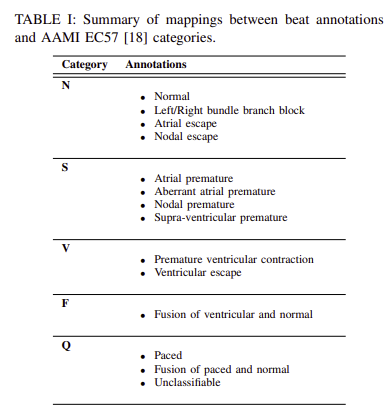

In [ ]:
fig = px.pie(data, names='Class')
fig.show()

In [ ]:
fig = px.histogram(data, x='Class')
fig.show()

## Data visualization

In [ ]:
x_axis = list(range(data.shape[1]))

### A couple of signals

In [ ]:
fig = go.Figure()
choices = np.random.choice(data.shape[0], 5)
for i in choices:
    fig.add_trace(go.Scatter(x=x_axis, y=data.iloc[i,:-2].values,
              mode='lines', name=str(data.iloc[i,-2]) + " - patient " + str(data.iloc[i,-1])))


# Edit the layout
fig.update_layout(title='Real Data Samples',
                   xaxis_title='Time',
                   yaxis_title='Signal', width=800, height=500)
fig.show()


### 1 signal for each class

In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Class within same patient, and within different patients
x_axis = list(range(data.shape[1]))
sampling_rate= 120
x_axis= [el/sampling_rate for el in x_axis]
classes = data['Class'].unique()
fig = go.Figure()
for c in classes:
    data_class = data.loc[data['Class']==c]
    fig.add_trace(go.Scatter(x=x_axis, y=data_class.iloc[0,:-2].values,
              mode='lines', name=str(data_class.iloc[0,-2])))


# Edit the layout
fig.update_layout(title='Real Data Samples',
                   xaxis_title='Time (s)',
                   yaxis_title='Signal', width=800, height=500)
fig.show()
fig.write_image("fig1.jpeg")

In [ ]:
# Class within same patient, and within different patients
x_axis = list(range(data.shape[1]))
sampling_rate= 120
x_axis= [el/sampling_rate for el in x_axis]
classes = data['Class'].unique()
fig = go.Figure()
for c in classes:
    data_class = data.loc[data['Class']==c]
    fig.add_trace(go.Scatter(x=x_axis, y=data_class.iloc[0,:-2].values,
              mode='lines', name=str(data_class.iloc[0,-2])))


# Edit the layout
fig.update_layout(title='Real Data Samples',
                   xaxis_title='Time (s)',
                   yaxis_title='Signal', width=800, height=500, template="none")
fig.show()

### Signals from same patient

In [ ]:
patient_nb = np.random.choice(data['Patient'].unique(), 12)
# Visualize real data
titles=['Patient ' + str(n) for n in patient_nb]
fig = make_subplots(rows=6, cols=2, subplot_titles=titles)
i = 1
j = 1
for n in patient_nb:
    data_patient = data.loc[data['Patient']==n].values[:,:-2]
    for k in range(5):
              fig.append_trace(go.Scatter(
                x=x_axis,
                y=data_patient[k])
              , row=i, col=j)
    if j==1:
        j=2
    else:
        j=1
        i+=1
fig.update_layout(title_text="Real data", width=700, height=1000, showlegend=False)
fig.show()


### Signals from each class (from same and different patients)

In [ ]:
# Class within same patient, and within different patients
classes = data['Class'].unique()

for c in classes:
    fig = go.Figure()
    patients = data.loc[data['Class']==c]['Patient'].unique()
    for j, p in enumerate(patients[:5]):
        condition1=data['Class']==c
        condition2= data['Patient']==p
        df_patient = data[condition1 & condition2].copy().reset_index(drop=True)
        for i in range(min(5, len(df_patient))):
          showlegend=False if i!=0 else True
          fig.add_trace(go.Scatter(x=x_axis, y=df_patient.iloc[i,:-2].values,
          mode='lines',  name=" ",
          legendgroup="group"+str(p), legendgrouptitle_text=f"Patient {p}",
          #name=str(df_patient.iloc[i,-1]),
          line=dict(color=px.colors.qualitative.Plotly[j]), showlegend=showlegend))


    # Edit the layout
    fig.update_layout(title=f'Class {c}',
                      xaxis_title='Time',
                      yaxis_title='Signal', width=800, height=500)
    fig.show()


In [ ]:
# Class within same patient, and within different patients
classes = data['Class'].unique()
sampling_rate= 120
x_axis= [el/sampling_rate for el in x_axis]
for c in classes:
    fig = go.Figure()
    patients = data.loc[data['Class']==c]['Patient'].unique()
    for j, p in enumerate(patients[:5]):
        condition1=data['Class']==c
        condition2= data['Patient']==p
        df_patient = data[condition1 & condition2].copy().reset_index(drop=True)
        for i in range(min(5, len(df_patient))):
          showlegend=False if i!=0 else True
          fig.add_trace(go.Scatter(x=x_axis, y=df_patient.iloc[i,:-2].values,
          mode='lines',  name=" ",
          legendgroup="group"+str(p), legendgrouptitle_text=f"Patient {p}",
          #name=str(df_patient.iloc[i,-1]),
          line=dict(color=px.colors.qualitative.T10[j]), showlegend=showlegend))


    # Edit the layout
    fig.update_layout(title=f'Class {c}',
                      xaxis_title='Time (s)',
                      yaxis_title='Signal', width=600, height=500, template="none")
    fig.show()


### Data distribution per class & patient

In [ ]:
data_plots = data.copy()
data_plots['Count']=1

In [ ]:
fig = px.histogram(data_plots, x="Patient", y="Count", color="Class", barmode="relative")
fig.update_xaxes(type='category')
fig.update_layout(yaxis_title='Number of signals')
fig.show()


In [ ]:
fig = px.pie(data_plots, values="Count", names='Patient')
fig.show()

In [ ]:
fig = px.treemap(data_plots, path=['Class', 'Patient'], values='Count')
fig.show()

In [ ]:
fig = px.treemap(data_plots, path=['Patient', 'Class'], values='Count')
fig.show()

### Visualize signal value distribution

In [ ]:
df_full_data = pd.DataFrame(data.values[:,:-2].flatten()).astype(float)
df_full_data.describe()

,0
count,1.239860e+07
mean,2.145790e-01
std,2.235147e-01
min,-1.017286e-01
25%,1.482922e-05
50%,1.717129e-01
75%,3.444957e-01
max,1.080831e+00


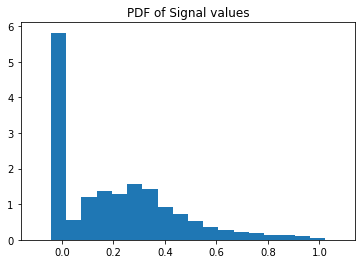

In [ ]:
n_bins = 20

plt.hist(data.values[:,:-2].flatten(), n_bins, density = True,
         histtype ='bar')

plt.title('PDF of Signal values')

plt.show()